# Import Libraries

In [1]:
import time
import pandas as pd
import numpy as np
import pickle as pkl
from collections import Counter
import re
import math
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
location_to_save = "data/final_files/"
large_location_to_save = "data/final_files/large_files/"

# Read Files

Default files.

In [28]:
entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")

Ratings with removed items that don't have metadata.

In [39]:
entire_ratings_filtered = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings_filtered = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_ISBNs.csv", low_memory=False, index_col=0).fillna("")

In [20]:
len(fairbook_ratings_filtered.ISBN.unique()), len(fairbook_books)

(6733, 6733)

In [21]:
len(fairbook_ratings_filtered), len(fairbook_ratings)

(86782, 88552)

Books dataset with correct ISBN (title-author combination).

In [22]:
entire_books_correct_ISBN = pd.read_csv(location_to_save+"items_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")

In [25]:
len(entire_books_correct_ISBN), len(entire_books_correct_ISBN.drop_duplicates("ISBN_alt"))

(271360, 216657)

ISBN dict.

In [26]:
with open('ISBN_dict.pkl', 'rb') as handle:
        large_ISBN_dict = pkl.load(handle)

# Remove duplicate ISBNs.

Fairbook ratings.

In [27]:
for index, row in fairbook_ratings_filtered.iterrows():
    if row.alt_title!="":
        ISBN = row.ISBN
        ISBN_alt = large_ISBN_dict[ISBN]
        fairbook_ratings_filtered.at[index, "ISBN"] = ISBN_alt

In [34]:
fairbook_ratings_filtered_correct = fairbook_ratings_filtered.drop_duplicates(["ISBN", "User-ID"])

Fairbook books.

In [31]:
fairbook_books["ISBN_alt"] = fairbook_books["ISBN"]

In [32]:
for index, row in fairbook_books.iterrows():
    if row.alt_title!="":
        ISBN = row.ISBN
        ISBN_alt = large_ISBN_dict[ISBN]
        fairbook_books.at[index, "ISBN_alt"] = ISBN_alt

Entire ratings.

In [42]:
for index, row in entire_ratings_filtered.iterrows():
    if row.alt_title!="":
        ISBN = row.ISBN
        ISBN_alt = large_ISBN_dict[ISBN]
        entire_ratings_filtered.at[index, "ISBN"] = ISBN_alt

In [38]:
len(entire_books_correct_ISBN.ISBN_alt.unique()), len(entire_ratings_filtered.drop_duplicates(["ISBN", "User-ID"]).ISBN.unique())

(216657, 222496)

In [43]:
entire_ratings_filtered_correct = entire_ratings_filtered.drop_duplicates(["ISBN", "User-ID"])

### Save!!!

In [44]:
fairbook_ratings_filtered_correct.to_csv(location_to_save + 'fairbook_ratings_with_readable_properties_filtered_correct_ISBNs.csv')
entire_ratings_filtered_correct.to_csv(large_location_to_save + 'entire_ratings_with_readable_properties_filtered_correct_ISBNs.csv')

In [47]:
fairbook_books.to_csv(location_to_save+"fairbook_books_with_readable_properties_correct_ISBN.csv")

# Finally make graphs.

### Set colormaps

In [172]:
color1=mcp.gen_color(cmap="Pastel2",n=9)
print(color1)

['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc', '#cccccc']


In [173]:
most_common_8 = [x[0] for x in Counter(entire_ratings_country.country).most_common()[:8]]

In [174]:
most_common_8.append('other')

In [175]:
colors = {}

In [176]:
most_common_8

['United States of America',
 'unknown',
 'United Kingdom',
 'Canada',
 'France',
 'United Kingdom,United Kingdom of Great Britain and Ireland',
 'Germany',
 'Republic of Ireland',
 'other']

In [177]:
i = 0
for country in most_common_8:
    colors[country] = color1[i]
    i+=1

In [178]:
colors

{'United States of America': '#b3e2cd',
 'unknown': '#fdcdac',
 'United Kingdom': '#cbd5e8',
 'Canada': '#f4cae4',
 'France': '#e6f5c9',
 'United Kingdom,United Kingdom of Great Britain and Ireland': '#fff2ae',
 'Germany': '#f1e2cc',
 'Republic of Ireland': '#cccccc',
 'other': '#cccccc'}

### Read data

Here are the files I will be using!

In [3]:
entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")

Just a small final test

In [6]:
fairbook_ratings.head(1)

,User-ID,ISBN,Book-Rating,title,author,year,publisher,alt_title,alt_author,correct_author,...,QID,sexuality,country,language,religion,gender,ethnicity,birthyear,deathyear,label
1,276847,3551551677,10,Harry Potter und der Stein der Weisen,Joanne K. Rowling,1999.0,Carlsen Verlag GmbH,Harry Potter und der Stein der Weisen,Joanne K. Rowling,Joanne K. Rowling,...,Q34660,,United Kingdom,English,Anglicanism,female,English people,1965,,J. K. Rowling


In [4]:
len(fairbook_books.ISBN_alt.unique()), len(fairbook_ratings.ISBN.unique())

(5504, 5504)

In [7]:
len(fairbook_ratings["User-ID"].unique())

6354

In [8]:
len(fairbook_ratings)

86356

In [181]:
len(entire_books.ISBN_alt.unique()), len(entire_ratings.ISBN.unique())

(216657, 222496)

In [10]:
len(entire_ratings["User-ID"].unique())

92106

The above makes sense because not all the books are in the ratings!

## Entire ratings

In [182]:
entire_ratings_country = pd.DataFrame(entire_ratings["country"])
entire_ratings_country["country"] = entire_ratings_country["country"].apply(lambda x: "unknown" if x=="" else x)

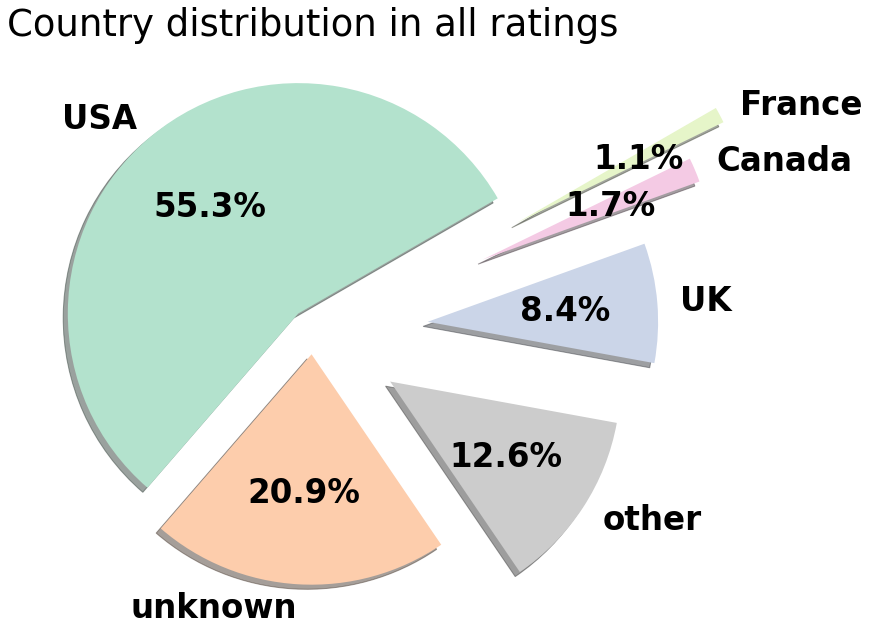

In [183]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = entire_ratings_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              ,colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in all ratings", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [184]:
df.country.value_counts()/len(df)*100

USA        55.311412
unknown    20.869367
other      12.612847
UK          8.374444
Canada      1.716108
France      1.115823
Name: country, dtype: float64

# Entire books

In [185]:
entire_books_country = pd.DataFrame(entire_books.drop_duplicates("ISBN")["country"])
entire_books_country["country"] = entire_books_country["country"].apply(lambda x: "unknown" if x=="" else x)

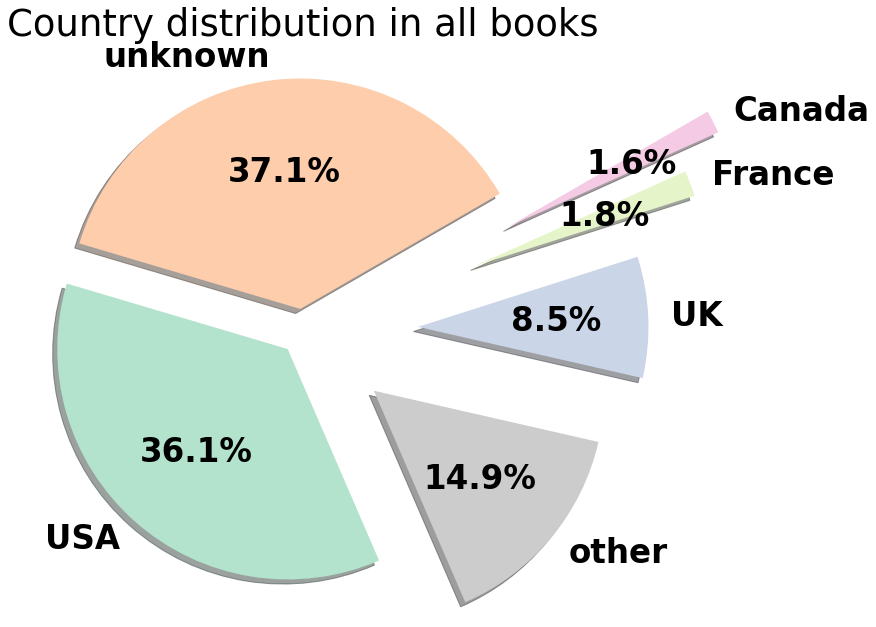

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = entire_books_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              ,colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in all books", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [187]:
df.country.value_counts()/len(df)*100

unknown    37.080631
USA        36.079378
other      14.937721
UK          8.490198
France      1.803140
Canada      1.608933
Name: country, dtype: float64

## Fairbook ratings

In [188]:
fairbook_ratings_country = pd.DataFrame(fairbook_ratings["country"])
fairbook_ratings_country["country"] = fairbook_ratings_country["country"].apply(lambda x: "unknown" if x=="" else x)

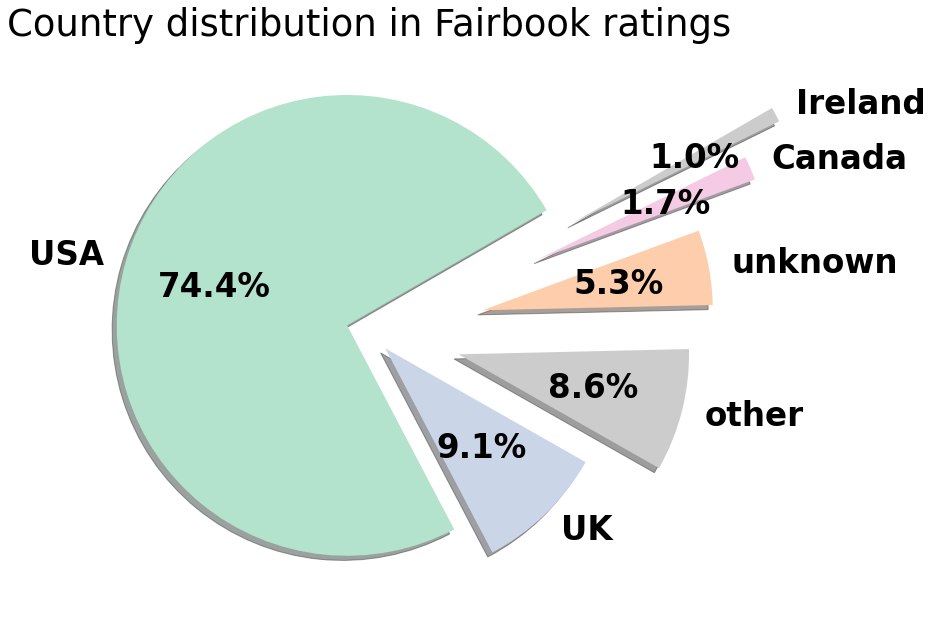

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = fairbook_ratings_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in Fairbook ratings", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [190]:
df.country.value_counts()/len(df)*100

USA        74.359628
UK          9.086803
other       8.583075
unknown     5.253833
Canada      1.673306
Ireland     1.043355
Name: country, dtype: float64

# Fairbook books

In [152]:
fairbook_books_country = pd.DataFrame(fairbook_books.drop_duplicates("ISBN_alt")["country"])
fairbook_books_country["country"] = fairbook_books_country["country"].apply(lambda x: "unknown" if x=="" else x)

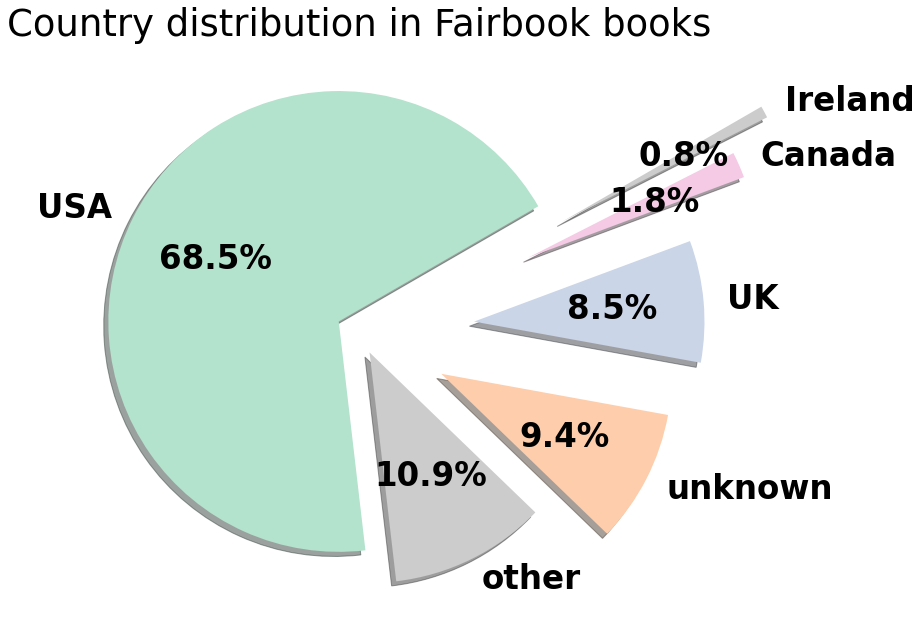

In [191]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = fairbook_books_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in Fairbook books", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [154]:
df.country.value_counts()/len(df)*100

USA        68.513808
other      10.937500
unknown     9.356831
UK          8.539244
Canada      1.816860
Ireland     0.835756
Name: country, dtype: float64